In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.stores.mysql import Mysql
from lib.oscillators import macd, stochastic_over_period, rsi
from lib.charts import chart

In [2]:
ticker = 'WFC'

mysql = Mysql()

In [3]:
data = mysql.get_closes_by_symbol(ticker)

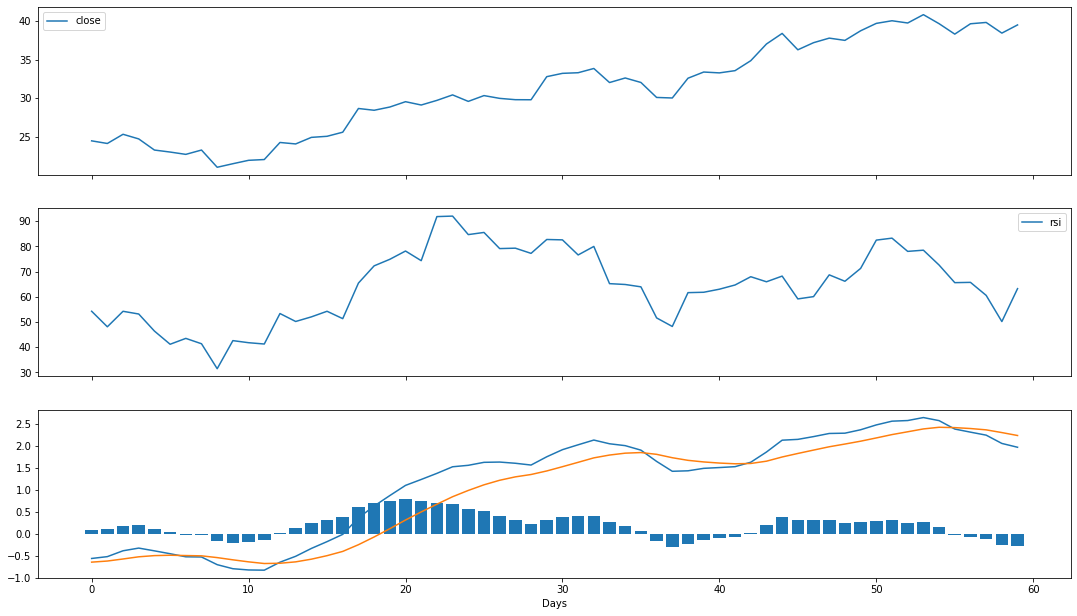

In [4]:
days = 60

chart_data = data['c']
(macd_vals, sig_vals, histo_vals) = macd(data[['t','c']])
rsi_vals = rsi(data[['t', 'c']])

chart_line = list(chart_data.tail(days))
rsi_line = list(rsi_vals.tail(days))
macd_line = list(macd_vals.tail(days))
sig_line = list(sig_vals.tail(days))
histo = list(histo_vals.tail(days))

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_line },
    { 'label': 'rsi', 'data': rsi_line }
]

chart(ticker, data_dicts, oscillator_dicts)